In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy.spatial import KDTree, cKDTree

import sys
sys.path.append('/home3/sreich/MITgcm_c68w/MITgcm/utils/python/MITgcmutils')
from MITgcmutils import rdmds

sys.path.append('/home3/sreich/jupyter/jupyter_notebooks')
from patchface3D import *
from read_write import *

In [2]:
nx = 270
ny = 270*13

#run_dir = '/nobackup/sreich/llc270_c68w_runs/run_pk0000841536_obsfit_misfit/'
run_dir = '/nobackup/sreich/multigrid_jpl_obsfit/llc270/run.fwd_270.076c.swot1992.iter0/'

In [3]:
#equi = xr.open_dataset(run_dir + 'swot_cycles_009_llc270_45_test_obsfit.equi.nc')
equi = xr.open_dataset(run_dir + 'swot_cycles_009_llc270_30_test_1992_obsfit.equi.nc')
equi

<xarray.Dataset>
Dimensions:   (iOBS: 49999)
Dimensions without coordinates: iOBS
Data variables:
    mod_val   (iOBS) float64 ...
    mod_mask  (iOBS) float64 ...

# Look at Misfits

In [4]:
#misfit = xr.open_dataset(run_dir + 'swot_cycles_009_llc270_45_test_obsfit.misfit.nc')
misfit = xr.open_dataset(run_dir + 'swot_cycles_009_llc270_30_test_1992_obsfit.misfit.nc')
misfit

<xarray.Dataset>
Dimensions:  (iOBS: 49999)
Dimensions without coordinates: iOBS
Data variables:
    misfit   (iOBS) float64 ...

In [5]:
#obsfit = xr.open_dataset(run_dir + 'swot_cycles_009_llc270_45_test_obsfit.nc')
obsfit = xr.open_dataset(run_dir + 'swot_cycles_009_llc270_30_test_1992_obsfit.nc')
obsfit

<xarray.Dataset>
Dimensions:               (iOBS: 49999, iSAMPLE: 49999, iINTERP: 8)
Dimensions without coordinates: iOBS, iSAMPLE, iINTERP
Data variables: (12/16)
    obs_date              (iOBS) float64 ...
    obs_YYYYMMDD          (iOBS) int64 ...
    obs_HHMMSS            (iOBS) int64 ...
    sample_x              (iSAMPLE) float64 ...
    sample_y              (iSAMPLE) float64 ...
    sample_z              (iSAMPLE) float64 ...
    ...                    ...
    sample_interp_YC11    (iOBS) float64 ...
    sample_interp_XCNINJ  (iOBS) float64 ...
    sample_interp_YCNINJ  (iOBS) float64 ...
    sample_interp_i       (iOBS) float64 ...
    sample_interp_j       (iOBS) float64 ...
    sample_interp_w       (iOBS, iINTERP) float64 ...

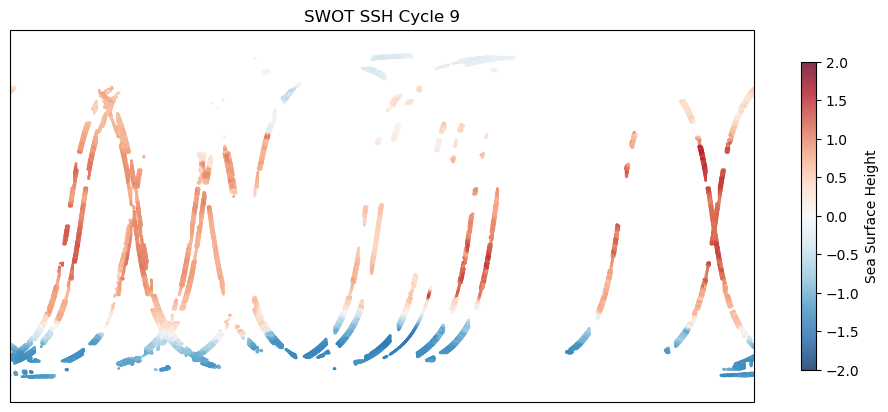

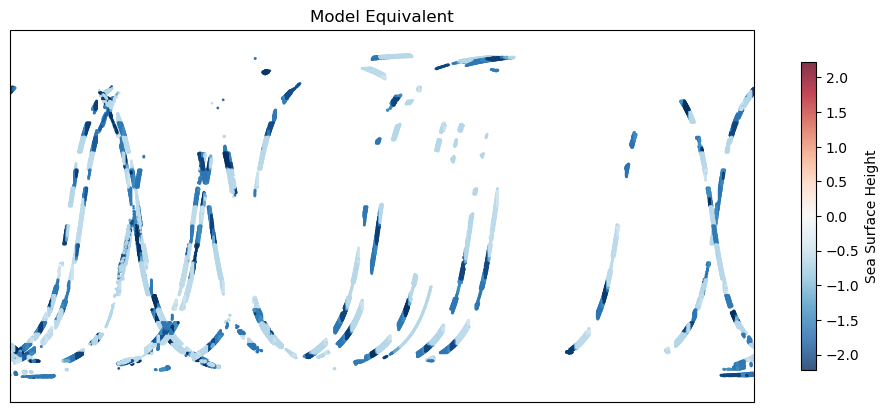

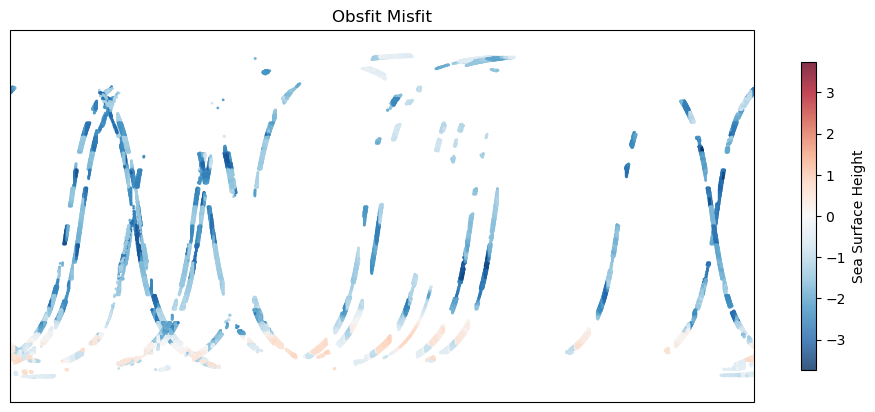

In [45]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


misfit_arr = misfit.misfit.values
misfit_arr[misfit_arr <= -9000] = np.nan

nan_mask = np.where(~np.isnan(misfit_arr))



latitudes = obsfit['sample_y'].values[nan_mask]
longitudes = obsfit['sample_x'].values[nan_mask]



sea_surface_height = obsfit['obs_val'].values[nan_mask]

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

sc = ax.scatter(latitudes, longitudes, c=sea_surface_height, cmap='RdBu_r', s=1, transform=ccrs.PlateCarree(), alpha=0.8, vmin = -2, vmax=2)
plt.colorbar(sc, orientation='vertical', shrink=0.5, label='Sea Surface Height')
plt.title('SWOT SSH Cycle 9')
plt.show()



m = equi['mod_val'].values[nan_mask]

vmax = np.nanmax(abs(m))
vmin = -vmax

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

sc = ax.scatter(latitudes, longitudes, c=m, cmap='RdBu_r', s=1, transform=ccrs.PlateCarree(), alpha=0.8, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(sc, orientation='vertical', shrink=0.5, label='Sea Surface Height')
plt.title('Model Equivalent')
plt.show()



misfit_arr = misfit.misfit.values
misfit_arr[misfit_arr <= -9000] = np.nan
misfit_arr = misfit_arr[~np.isnan(misfit_arr)]



vmax = np.nanmax(abs(misfit_arr))
vmin = -vmax

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

sc = ax.scatter(latitudes, longitudes, c=misfit_arr, cmap='RdBu_r', s=1, transform=ccrs.PlateCarree(), alpha=0.8, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(sc, orientation='vertical', shrink=0.5, label='Sea Surface Height')
plt.title('Obsfit Misfit')
plt.show()


In [7]:
np.unique(obs_date, return_counts=True)

obs_datetime[5]

time_mask = obs_datetime == np.unique(obs_datetime)[5]



sea_surface_height[time_mask]




len(np.unique(np.c_[latitudes[time_mask], longitudes[time_mask]], axis=1)), obs_datetime[5]

NameError: name 'obs_date' is not defined

In [10]:


subset = obsfit.sel(iOBS=obsfit.iOBS.isin(nan_mask)).sel(iSAMPLE=obsfit.iSAMPLE.isin(nan_mask))



subset['obs_datetime'] = ('iOBS', obs_datetime)
subset


subset

NameError: name 'obs_datetime' is not defined

In [16]:
# df_subset = subset.to_dataframe()
# gb = df_subset.groupby(['obs_datetime', 'sample_interp_XC11', 'sample_interp_YC11', 'sample_interp_XCNINJ', 'sample_interp_YCNINJ', 'sample_interp_i', 'sample_interp_j'])
# counts = gb.size().to_frame(name='counts')
# # gb_stats = (counts
# # .join(gb.agg({'ssh': 'mean'}).rename(columns={'ssh': 'obs_val'}))
# # .join(gb.agg({'ssh': 'std'}).rename(columns={'ssh': 'ssh_std'}))
# # .join(gb.agg({'latitude': 'mean'}).rename(columns={'latitude': 'sample_y'}))
# # .join(gb.agg({'latitude': 'std'}).rename(columns={'latitude': 'latitude_std'}))
# # .join(gb.agg({'longitude': 'mean'}).rename(columns={'longitude': 'sample_x'}))
# # .join(gb.agg({'longitude': 'std'}).rename(columns={'longitude': 'longitude_std'}))
# # .join(gb.agg({'time': 'mean'}).rename(columns={'time': 'time_mean'}))
# # #.join(gb.agg({'time': 'std'}).rename(columns={'time': 'time_std'}))
# # .reset_index()
# # )

df = subset[['obs_datetime', 'sample_interp_XC11', 'sample_interp_YC11', 'sample_interp_XCNINJ', 'sample_interp_YCNINJ', 'sample_interp_i', 'sample_interp_j']].to_dataframe()
df

,obs_datetime,sample_interp_XC11,sample_interp_YC11,sample_interp_XCNINJ,sample_interp_YCNINJ,sample_interp_i,sample_interp_j
iOBS,,,,,,,
0,2.024011e+13,-38.418259,-76.175949,-23.166658,-70.074776,38.0,10.0
1,2.024011e+13,-38.418259,-76.175949,-23.166658,-70.074776,40.0,12.0
2,2.024011e+13,-38.418259,-76.175949,-23.166658,-70.074776,42.0,20.0
3,2.024011e+13,-38.418259,-76.175949,-23.166658,-70.074776,42.0,21.0
4,2.024011e+13,-38.418259,-76.175949,-23.166658,-70.074776,43.0,20.0
...,...,...,...,...,...,...,...
439005,2.024011e+13,0.000000,0.000000,0.000000,0.000000,45.0,18.0
439006,2.024011e+13,0.000000,0.000000,0.000000,0.000000,45.0,19.0
439007,2.024011e+13,0.000000,0.000000,0.000000,0.000000,45.0,20.0


In [33]:
df_20min = df[df['obs_datetime']== np.unique(obs_datetime)[5]]

unique_combinations = df_20min.drop_duplicates()


unique_combinations

,obs_datetime,sample_interp_XC11,sample_interp_YC11,sample_interp_XCNINJ,sample_interp_YCNINJ,sample_interp_i,sample_interp_j
iOBS,,,,,,,
355426,2.024010e+13,-37.833332,-56.917942,-23.166666,-48.497417,1.0,19.0
355427,2.024010e+13,-37.833332,-56.917942,-23.166666,-48.497417,1.0,20.0
355428,2.024010e+13,-37.833332,-56.917942,-23.166666,-48.497417,1.0,21.0
355429,2.024010e+13,-37.833332,-56.917942,-23.166666,-48.497417,1.0,22.0
355430,2.024010e+13,-37.833332,-56.917942,-23.166666,-48.497417,1.0,23.0
...,...,...,...,...,...,...,...
358109,2.024010e+13,0.000000,0.000000,0.000000,0.000000,45.0,21.0
358110,2.024010e+13,0.000000,0.000000,0.000000,0.000000,45.0,22.0
358111,2.024010e+13,0.000000,0.000000,0.000000,0.000000,45.0,23.0


# Misfit on LLC270 Grid

In [8]:
# reshape xc, yc from compact (13*nx, nx) form to worldmap view (nz=1,4*nx, 4*nx)
nx = 270
nz = 50

grid_dir='/nobackup/hzhang1/pub/llc270/GRID/'

xc = rdmds(grid_dir+'XC')
yc = rdmds(grid_dir+'YC')

xc = patchface3D(xc,nx,1)
yc = patchface3D(yc,nx,1)

hfacc = rdmds(grid_dir+'hFacC')
hfacc = patchface3D(hfacc,nx,nz)

llc_coords = np.c_[yc.ravel(), xc.ravel()]
#swot_coords = np.c_[obsfit.sample_x.values, obsfit.sample_y.values]
swot_coords = np.c_[longitudes, latitudes]

# compute nearest_swot_index relative to worldmap view
kd_tree = KDTree(llc_coords)
distance, nearest_swot_index_in_llc = kd_tree.query(swot_coords, k=1)




1
(270, 810, 1)
1
(270, 810, 1)
50
(270, 810, 50)


In [9]:
def round_to_nearest_20_min_block(time_hmmss):
    # If time is in HMMSS format (5 digits), add a leading zero for the hour
    if time_hmmss < 100000:
        hours = time_hmmss // 10000  # 1-digit hour
        minutes = (time_hmmss // 100) % 100
    else:
        hours = time_hmmss // 10000  # 2-digit hour
        minutes = (time_hmmss // 100) % 100

    # Round minutes to nearest 20-minute block
    if minutes < 20:
        rounded_minutes = 0
    elif minutes < 40:
        rounded_minutes = 20
    else:
        rounded_minutes = 40

    # Reconstruct the new time in HHMMSS format
    new_time = hours * 10000 + rounded_minutes * 100
    return new_time


def convert_time_array_to_20_min_blocks(time_array):
    return np.array([round_to_nearest_20_min_block(t) for t in time_array])


rounded_times = convert_time_array_to_20_min_blocks(obsfit.obs_HHMMSS.values[nan_mask])
obs_datetime = obsfit.obs_YYYYMMDD.values[nan_mask]*1e6 + rounded_times

rounded_times, obsfit.obs_HHMMSS.values[nan_mask], obs_datetime

(array([ 14000,  14000,  14000, ..., 130000, 130000, 130000]),
 array([ 15644,  15646,  15648, ..., 130755, 130753, 130627]),
 array([1.99201060e+13, 1.99201060e+13, 1.99201060e+13, ...,
        1.99201081e+13, 1.99201081e+13, 1.99201081e+13]))

In [14]:
import sys

np.set_printoptions(threshold=1e4)

obs_datetime

array([1.99201060e+13, 1.99201060e+13, 1.99201060e+13, ...,
       1.99201081e+13, 1.99201081e+13, 1.99201081e+13])

In [58]:
misfit_llc = np.nan * np.ones((len(np.unique(obs_datetime)), xc.shape[1], xc.shape[2])) 
#misfit_llc = np.nan * np.ones((len(obsfit.obs_date.values[nan_mask]), xc.shape[1], xc.shape[2])) 


uncert_arr = obsfit.sel(iOBS=obsfit.iOBS.isin(nan_mask)).sel(iSAMPLE=obsfit.iSAMPLE.isin(nan_mask)).obs_uncert.values
uncert_llc = np.nan * np.ones((len(np.unique(obs_datetime)), xc.shape[1], xc.shape[2])) 

nonnan_pts = []

for t_idx, time in enumerate(np.unique(obs_datetime)): # for time interpolation
#for t_idx, time in enumerate(obsfit.obs_date.values[nan_mask]):
    # Get the observations corresponding to this time
    time_mask = obs_datetime == time
    swot_coords_time = np.c_[longitudes[time_mask], latitudes[time_mask]]
    misfit_time = misfit_arr[time_mask]
    uncert_time = uncert_arr[time_mask]
    
    
    # Perform KDTree query to find nearest neighbors for this time step
    distance, nearest_swot_index_in_llc = kd_tree.query(swot_coords_time, k=1)
    nonnan_nearest_idx = nearest_swot_index_in_llc[~np.isnan(misfit_time)]
    
    # Interpolate misfit values onto the structured grid for this time step
    misfit_llc[t_idx].ravel()[nonnan_nearest_idx] = misfit_time[~np.isnan(misfit_time)]
    #misfit_llc[t_idx].ravel()[nearest_swot_index_in_llc] = misfit_time[~np.isnan(misfit_time)]

    uncert_llc[t_idx].ravel()[nonnan_nearest_idx] = uncert_time[~np.isnan(uncert_time)]


    nonnan_pts.append(len(np.unique(nonnan_nearest_idx)))
    

In [48]:
len(nonnan_nearest_idx), len(swot_coords_time), len(np.unique(obs_datetime)), t_idx


len(obs_datetime), len(misfit_llc[~np.isnan(misfit_llc)])


num, cts = np.unique(obs_datetime, return_counts=True)



In [49]:

len(np.unique(nearest_swot_index_in_llc)), len(nonnan_nearest_idx), nonnan_pts[-1], np.sum(~np.isnan(misfit_time))

(103, 103, 103, 103)

In [50]:
np.sum(nonnan_nearest_idx - nearest_swot_index_in_llc)

0

In [51]:
nonnan_pts - cts

array([ -40,  -73,    0,  -41,  -22,    0,    0,    0,    0,    0,    0,
          0,    0,    0, -129,    0,    0,    0,    0,    0,    0,   -1,
       -109,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  -33,    0,    0,    0,    0,    0,  -81,    0,    0,
          0,    0,    0,    0,    0,    0,  -89, -224,    0,    0,    0,
          0,  -65,    0,    0,    0])

/var/tmp/pbs.20805707.pbspl1.nas.nasa.gov/ipykernel_8369/4121840114.py:1: RuntimeWarning: Mean of empty slice
  plot_misfit_llc = np.nanmean(misfit_llc, axis=0)


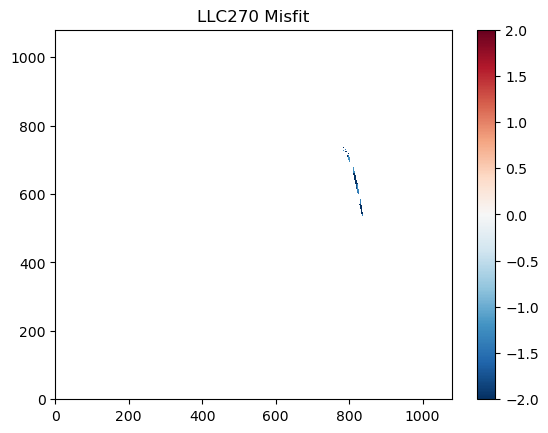

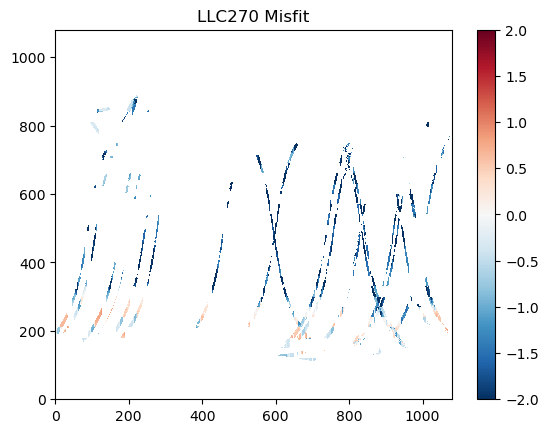

In [52]:
plot_misfit_llc = np.nanmean(misfit_llc, axis=0)

plt.pcolormesh(misfit_llc[0,:,:], cmap = 'RdBu_r', vmin=-2, vmax=2)
plt.colorbar()
plt.title('LLC270 Misfit')
plt.show()


plt.pcolormesh(plot_misfit_llc, cmap = 'RdBu_r', vmin=-2, vmax=2)
plt.colorbar()
plt.title('LLC270 Misfit')
plt.show()

In [16]:


# #misfit_arr = (misfit.misfit.values / obsfit.obs_uncert.values)**2
# #misfit_arr = misfit_arr[~np.isnan(misfit_arr)]

# nonnan_nearest_idx = nearest_swot_index_in_llc[nan_mask]

# misfit_llc = np.nan*np.ones_like(xc[0,:,:]) 
# misfit_llc.ravel()[nonnan_nearest_idx] = misfit_arr

# plt.pcolormesh(misfit_llc*hfacc[0,:,:], cmap = 'RdBu_r', vmin=-2, vmax=2)
# plt.colorbar()
# plt.title('LLC270 Misfit')

/var/tmp/pbs.20805707.pbspl1.nas.nasa.gov/ipykernel_8369/2014240729.py:12: RuntimeWarning: Mean of empty slice
  plt.pcolormesh(np.nanmean(misfit_90, axis=0), cmap = 'RdBu_r', vmin=-2, vmax=2)


Text(0.5, 1.0, 'LLC90 Misfit')

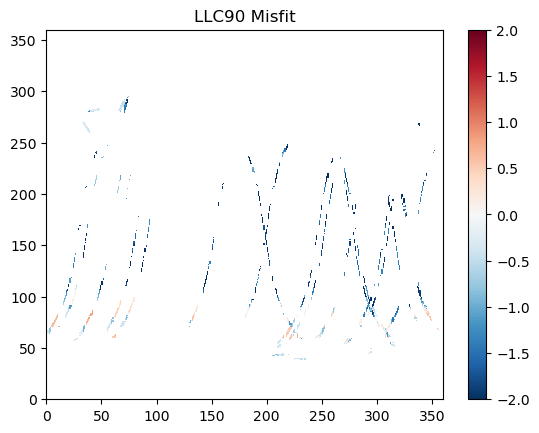

In [53]:
nz = 50
nx_lr = 90
factor = 3


reshaped_misfit_llc = misfit_llc.reshape(misfit_llc.shape[0], nx_lr*4, factor, nx_lr*4, factor)
misfit_90 = reshaped_misfit_llc.mean(axis=(2, 4))

# reshaped_misfit_llc = misfit_llc.reshape(nx_lr*4, factor, nx_lr*4, factor)
# misfit_90 = reshaped_misfit_llc.mean(axis=(1, 3))

plt.pcolormesh(np.nanmean(misfit_90, axis=0), cmap = 'RdBu_r', vmin=-2, vmax=2)
#plt.pcolormesh(misfit_90, cmap = 'RdBu_r', vmin=-2, vmax=2)
plt.colorbar()
plt.title('LLC90 Misfit')

# Compute Cost

In [54]:
# Cost is correct
#misfit_arr = misfit_arr[~np.isnan(misfit_arr)]

# Confirm high-res cost

obs_weight = 1/(obsfit.obs_uncert.values)**2 * equi.mod_mask.values
obs_weight = obs_weight[obs_weight > 0]

print(f'Cost = {np.nansum(obs_weight * misfit_arr**2)}')
print(f'Number of points = {len(misfit_arr)}')


Cost = 233306526.4881967
Number of points = 37500


In [55]:
# Compute llc high-res cost


llc_cost = np.nansum(np.ones_like(misfit_llc)/(0.02**2) * misfit_llc**2)

print(f'Cost = {llc_cost}')
print(f'Number of points = {len(misfit_llc[~np.isnan(misfit_llc)])}')



Cost = 227723369.93025944
Number of points = 36593


# Coarsen Cost

In [76]:
reshaped_uncert_llc = uncert_llc.reshape(uncert_llc.shape[0], nx_lr*4, factor, nx_lr*4, factor)
uncert_90 = reshaped_uncert_llc.mean(axis=(2, 4))


cost_90 = np.nansum((misfit_90/uncert_90)**2 )


print(f'LLC90 Cost = {cost_90}')
print(f'Number of points = {len(misfit_90[~np.isnan(misfit_90)])}')






LLC90 Cost = 10763712.95429575
Number of points = 1943
